In [84]:
# -*- coding: utf-8 -*-
"""
@description: Shopping List
@author:Yee
"""

from __future__ import print_function
from __future__ import unicode_literals
from matplotlib import pyplot as plt
from enum import Enum
from prettytable import PrettyTable
from IPython.display import display
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import xlrd
import time

In [101]:
""" @:parameter type: different share type as an enum"""

class ShareType(Enum):
    AllShare = 1
    Chris = 2
    JoJo = 3
    Yee = 4
    ChrisAndJo = 5
    ChrisAndYee = 6
    JoAndYee = 7

In [134]:
""" show shopping list in a pretty table"""

def showPersonList(index):
    t = PrettyTable()
    total = 0
    t.field_names = ["ID", "Name", "Price", "Yee", "Chris", "Jossie", "Tax"]
    print(time.strftime("%Y-%m-%d %H:%M:%S"))
    for i in range(size):
        if data[i][index] == 1:
            t.add_row([i, data[i][0], data[i][1], data[i][2], data[i][3], data[i][4], data[i][5]])
            if data[i][5] == 1:
                total += data[i][1] * 1.15
            else:
                total += data[i][1] 
    totalPrice.append(total)
    print(t)
    print("Total:", total)
            


In [170]:
""" show shopping list in a pandas"""

def showPersonList2(index):
    # Total amount
    total = 0
    # Selected rows from whole dataFrame, for which the according person should pay
    dataList = list()
    columnNames = ["ID", "Name", "Price", "Yee", "Chris", "Jossie", "Tax", "Payer"]
    for i in range(size):
        if data[i][index] != 1:
            continue
        dataList.append([i, data[i][0], data[i][1], data[i][2], data[i][3], data[i][4], data[i][5], data[i][6]])
        if data[i][5] == 1:
            total += data[i][1] * 1.15
        else:
            total += data[i][1]
    dFrame = pd.DataFrame(dataList, columns=columnNames)
    display(dFrame)
    payer = dFrame.Payer.unique()
    print("Shopping List of", name[index-2])
    for p in payer:
        subtotal = 0
        for i in range(dFrame.shape[0]):
            if dataList[i][7] == p:
                if dataList[i][6] == 1:
                    subtotal += dataList[i][2] * 1.15
                else:
                    subtotal += dataList[i][2]
        print(p, subtotal)
    
    print("Total:", total)
    


In [171]:
""" show item price distribution"""

def showDistribution(data):
    for i in range(size):
        priceList.append(data[i][1])

    sns.displot(priceList, bins=100)
    plt.style.use("dark_background")
    plt.title("Distribution of price", fontsize=15, color = 'white')
    plt.show()

In [172]:
""" show subtotal pie graph"""

def showPiePlot(data):
    sns.set_style("whitegrid")  
    plt.plot(np.arange(10))  
    plt.show()  

In [177]:
"""  show item price distribution bar graph"""

def showBarGraph(data):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(20,10)
    position = np.arange(0, size*2, 2)
    ax.bar(position, df['Price'].tolist(), width=1, color='darkslateblue' )
    ax.set_xticklabels(df['Name'].tolist())
    ax.set_xticks(position)
    ax.set_ylabel('Price', fontsize=12) 
    ax.set_xlabel('Item', fontsize=12)
    plt.title('Price distribution ', fontsize=26)
    plt.xticks(rotation=90, fontsize=10)
    plt.rcParams['font.sans-serif']=['SimHei']

In [178]:
priceList = list()
name = ['Yee', 'Chris', 'Jo']
totalPrice = list()
df = pd.read_excel ('D:\Desktop\Shopping list.xlsx', 'Sheet5')
data = df.values
size = int(data.shape[0])
display(df)

,Name,Price,Yee,Chris,Jossie,Tax,Payer
0,provigo水果,5.07,1,0,1,0,Jossie
1,provigo肉,17.26,1,0,0,0,Jossie
2,Costco食物,139.00,1,0,1,0,Jossie
3,中超食物1,30.96,1,0,1,0,Chris
4,中超食物2,171.35,1,0,1,0,Chris
5,卫龙*3,4.77,1,0,0,0,Chris
6,黑金酥,9.80,0,0,1,0,Chris
7,小饼干,2.99,0,0,1,0,Chris
8,大福,9.99,1,1,1,1,Chris
9,栗子糕,2.99,0,0,1,0,Chris


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    21 non-null     object 
 1   Price   21 non-null     float64
 2   Yee     21 non-null     int64  
 3   Chris   21 non-null     int64  
 4   Jossie  21 non-null     int64  
 5   Tax     21 non-null     int64  
 6   Payer   21 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.3+ KB


,ID,Name,Price,Yee,Chris,Jossie,Tax,Payer
0,0,provigo水果,2.535,1,0,1,0,Jossie
1,1,provigo肉,17.260,1,0,0,0,Jossie
2,2,Costco食物,69.500,1,0,1,0,Jossie
3,3,中超食物1,15.480,1,0,1,0,Chris
4,4,中超食物2,85.675,1,0,1,0,Chris
5,5,卫龙*3,4.770,1,0,0,0,Chris
6,8,大福,3.330,1,1,1,1,Chris
7,11,辣条*2,4.000,1,0,0,0,Chris
8,12,良品铺子辣条,3.590,1,0,0,0,Chris
9,18,Costco酱油,3.945,1,0,1,0,Chris


Shopping List of Yee
Jossie 89.295
Chris 134.91449999999998
Total: 224.2095


,ID,Name,Price,Yee,Chris,Jossie,Tax,Payer
0,8,大福,3.33,1,1,1,1,Chris
1,13,蚝油,4.99,0,1,0,0,Chris
2,14,生抽,2.99,0,1,0,0,Chris
3,15,小米辣,1.99,0,1,0,0,Chris
4,16,料酒,2.99,0,1,0,0,Chris


Shopping List of Chris
Chris 16.7895
Total: 16.7895


,ID,Name,Price,Yee,Chris,Jossie,Tax,Payer
0,0,provigo水果,2.535,1,0,1,0,Jossie
1,2,Costco食物,69.500,1,0,1,0,Jossie
2,3,中超食物1,15.480,1,0,1,0,Chris
3,4,中超食物2,85.675,1,0,1,0,Chris
4,6,黑金酥,9.800,0,0,1,0,Chris
5,7,小饼干,2.990,0,0,1,0,Chris
6,8,大福,3.330,1,1,1,1,Chris
7,9,栗子糕,2.990,0,0,1,0,Chris
8,10,猫山王,11.970,0,0,1,0,Chris
9,17,露露,4.590,0,0,1,0,Chris


Shopping List of Jo
Jossie 72.035
Chris 154.8945
Total: 226.92950000000002


j:\pythonenvironment\venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


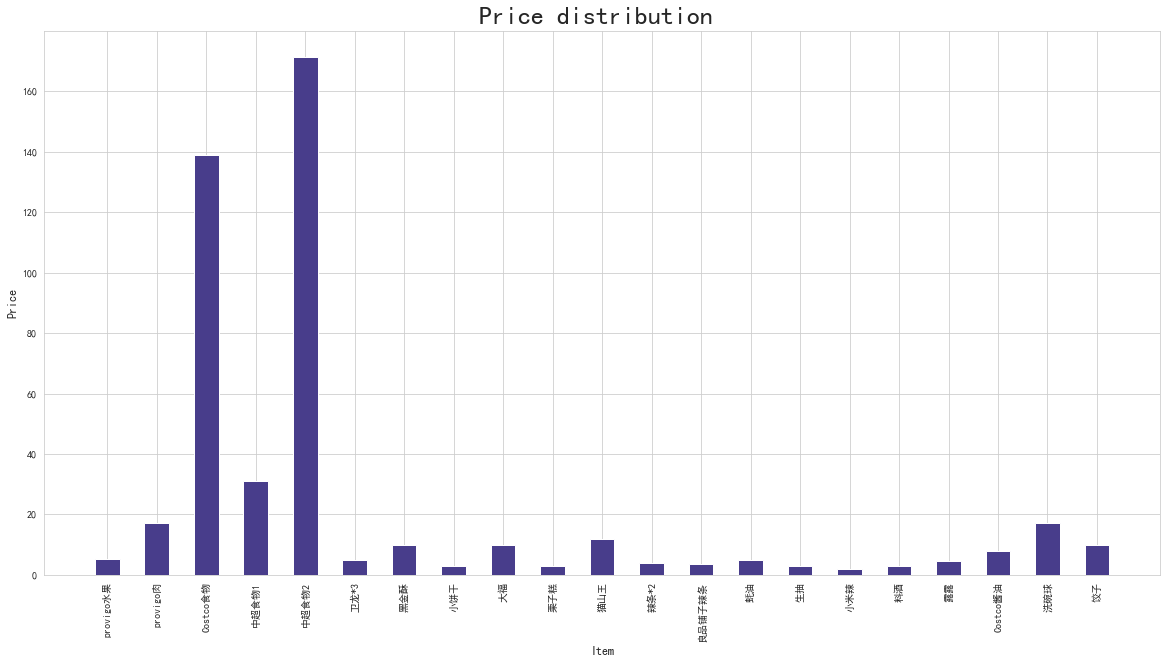

In [180]:
for i in range(size):
    divide = data[i][2] + data[i][3] + data[i][4]
    data[i][1] = data[i][1] / divide
    
for i in range(2,5):
    showPersonList2(i)
    
# showDistribution(data)
# showPiePlot(data)
showBarGraph(data)
